# 练习3-2
使用`scipy.ndimage.interpolation`模块中的`shift()`函数将MNIST图像向任意方向（上、下、左、右）移动一个像素。然后，对训练集中的每张图片，创建四个位移后的副本（每个方向一个），添加到训练集。最后，在每个扩张过的训练集上训练模型，衡量其在测试集上的精度。**如此模型的表现可以变得更好！**这中人工扩展训练集的技术称为**数据增广**或**训练集扩展**

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
plt.style.use('ggplot')

In [3]:
# 下载MNIST
mnist = fetch_openml('mnist_784')


In [4]:
mnist_data = mnist['data']
mnist_label = mnist['target'].astype(np.uint8)
X_train, y_train, X_test, y_test = mnist_data[:60000], mnist_label[:60000], mnist_data[60000:], mnist_label[60000:]
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [12]:
from scipy.ndimage.interpolation import shift
def shift_image(image, dx, dy):
    '''
    移动图像
    '''
    image = image.reshape(28,28)
    shift_image = shift(image, [dy, dx])
    return shift_image.reshape([-1])

&lt;matplotlib.image.AxesImage at 0x7fea43d30890&gt;

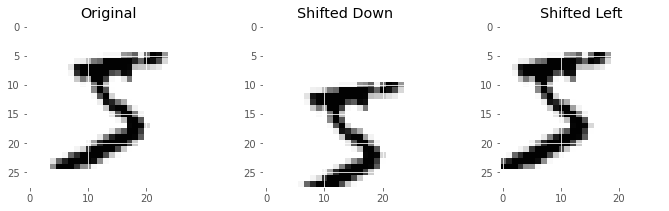

In [13]:
image = X_train[0]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12, 3))

plt.subplot(131)
plt.title("Original")
plt.imshow(image.reshape(28,28), cmap="Greys")

plt.subplot(132)
plt.title("Shifted Down")
plt.imshow(shifted_image_down.reshape(28,28), cmap="Greys")

plt.subplot(133)
plt.title("Shifted Left")
plt.imshow(shifted_image_left.reshape(28,28), cmap="Greys")

In [14]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

In [ ]:
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

len(X_train_augmented), len(y_train_augmented)

In [ ]:
X_train_augmented.type

In [ ]:
# 前面我们使用网格搜索找到的最佳参数
# {'algorithm': 'ball_tree', 'n_neighbors': 4, 'weights': 'distance'}
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=4, *, weights='distance', algorithm='ball_tree')

In [ ]:
knn_clf.fit(X_train_augmented, y_train_augmented)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = knn_clf.predict(X_test)


In [ ]:
accuracy_score(y_test, y_pred, average='macro')